In [1]:
import pandas as pd
from pandas.tseries.offsets import MonthBegin
import matplotlib.pyplot as plt
import numpy as np
from dateutil.relativedelta import relativedelta

# refinancing_rate

In [2]:
url = "https://www.cba.am/stat/stat_data_eng/8_policy_rates_eng.xlsx"
refinancing_rate = pd.read_excel(url)

print(refinancing_rate)

    Interest rates of the CBA operations in financial market (%)  \
0                                                  NaN             
1                                          Time Period             
2                                27.12.2003-08.03.2004             
3                                09.03.2004-06.04.2004             
4                                07.04.2004-13.07.2004             
..                                                 ...             
136                              01.11.2023-12.12.2023             
137                              13.12.2023-30.01.2024             
138                                        31.01.2024-             
139                                                NaN             
140  1 Untill February 2010 this operation was call...             

            Unnamed: 1          Unnamed: 2     Unnamed: 3  
0                  NaN                 NaN            NaN  
1    Refinancing rates  Deposits Attracted  Lombard Repo1  
2  

In [3]:
refinancing_rate = refinancing_rate.iloc[2:]
refinancing_rate.columns = ["Time_Period", "Refinancing_Rates", "Deposits_Attracted", "Lombard_Repo1"]

refinancing_rate = refinancing_rate[['Time_Period', 'Refinancing_Rates']]

refinancing_rate.dropna(inplace=True)

refinancing_rate['Start_Date_Str'] = refinancing_rate['Time_Period'].str.split('-').str[0].str.strip()

refinancing_rate['Start_Date'] = pd.to_datetime(refinancing_rate['Start_Date_Str'], format='%d.%m.%Y', errors='coerce')

refinancing_rate.drop('Start_Date_Str', axis=1, inplace=True)

refinancing_rate.drop('Time_Period', axis=1, inplace=True)

refinancing_rate.set_index('Start_Date', inplace=True)

monthly_df = refinancing_rate.resample('M').ffill()

In [4]:
print(refinancing_rate)

           Refinancing_Rates
Start_Date                  
2003-12-27                 9
2004-03-09                 6
2004-04-07                 6
2004-07-14                 5
2004-08-23                 4
...                      ...
2023-08-02             10.25
2023-09-13              9.75
2023-11-01               9.5
2023-12-13              9.25
2024-01-31              8.75

[137 rows x 1 columns]


In [5]:
refinancing_rate.index = refinancing_rate.index.to_period('M')
print(refinancing_rate)

           Refinancing_Rates
Start_Date                  
2003-12                    9
2004-03                    6
2004-04                    6
2004-07                    5
2004-08                    4
...                      ...
2023-08                10.25
2023-09                 9.75
2023-11                  9.5
2023-12                 9.25
2024-01                 8.75

[137 rows x 1 columns]


In [6]:
# Ensure the index is in timestamp format
refinancing_rate.index = refinancing_rate.index.to_timestamp()

# Calculate the start and end dates
start_date = refinancing_rate.index.min()
end_date = refinancing_rate.index.max()

# Modify end_date to extend by one more month
end_date += relativedelta(months=1)

# Generate all months between start and extended end
current_date = start_date

while current_date <= end_date:
    if current_date not in refinancing_rate.index:
        # Insert NA value for months that do not exist in the DataFrame
        refinancing_rate.at[current_date, 'Refinancing_Rates'] = pd.NA
    current_date += relativedelta(months=1)

# Sort the DataFrame by index after adding missing months
refinancing_rate.sort_index(inplace=True)

# Display the updated DataFrame
print(refinancing_rate.head(15))  # Adjust as needed to view more rows
print(refinancing_rate.tail())

           Refinancing_Rates
Start_Date                  
2003-12-01                 9
2004-01-01              <NA>
2004-02-01              <NA>
2004-03-01                 6
2004-04-01                 6
2004-05-01              <NA>
2004-06-01              <NA>
2004-07-01                 5
2004-08-01                 4
2004-09-01              <NA>
2004-10-01              3.75
2004-11-01              <NA>
2004-12-01              <NA>
2005-01-01               4.5
2005-02-01              <NA>
           Refinancing_Rates
Start_Date                  
2023-10-01              <NA>
2023-11-01               9.5
2023-12-01              9.25
2024-01-01              8.75
2024-02-01              <NA>


In [7]:
# Fill NaN values with the previous non-NaN value in the Refinancing_Rates column
refinancing_rate['Refinancing_Rates'] = refinancing_rate['Refinancing_Rates'].fillna(method='ffill')

# Display the DataFrame to verify the NaN values are filled
print(refinancing_rate.head(15))  # Adjust as needed
print(refinancing_rate.tail())


            Refinancing_Rates
Start_Date                   
2003-12-01               9.00
2004-01-01               9.00
2004-02-01               9.00
2004-03-01               6.00
2004-04-01               6.00
2004-05-01               6.00
2004-06-01               6.00
2004-07-01               5.00
2004-08-01               4.00
2004-09-01               4.00
2004-10-01               3.75
2004-11-01               3.75
2004-12-01               3.75
2005-01-01               4.50
2005-02-01               4.50
            Refinancing_Rates
Start_Date                   
2023-10-01               9.75
2023-11-01               9.50
2023-12-01               9.25
2024-01-01               8.75
2024-02-01               8.75


/var/folders/b_/7pbwf7sn5b77t2qtkgd5s3b80000gn/T/ipykernel_25467/3379696024.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  refinancing_rate['Refinancing_Rates'] = refinancing_rate['Refinancing_Rates'].fillna(method='ffill')


In [8]:
refinancing_rate.index = refinancing_rate.index.to_period('M')
print(refinancing_rate)

            Refinancing_Rates
Start_Date                   
2003-12                  9.00
2004-01                  9.00
2004-02                  9.00
2004-03                  6.00
2004-04                  6.00
...                       ...
2023-10                  9.75
2023-11                  9.50
2023-12                  9.25
2024-01                  8.75
2024-02                  8.75

[247 rows x 1 columns]


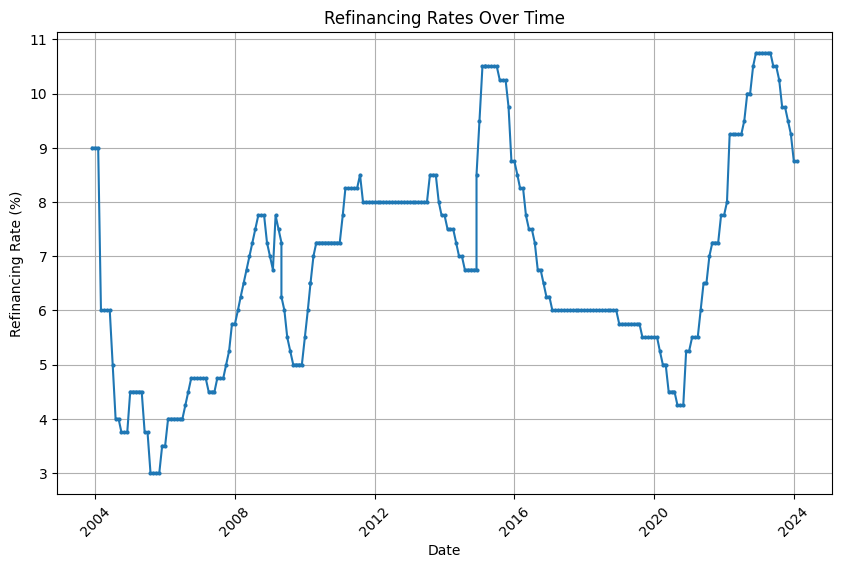

In [9]:
# Correctly convert PeriodIndex to DateTimeIndex
refinancing_rate.index = refinancing_rate.index.to_timestamp()

# Now proceed with plotting
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.plot(refinancing_rate.index, refinancing_rate['Refinancing_Rates'], marker='o', linestyle='-', markersize=2)
plt.title('Refinancing Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Refinancing Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better readability

# Show the plot
plt.show()

In [10]:
refinancing_rate = refinancing_rate.reset_index()

In [11]:


# Check for duplicated 'Start_Date'
duplicates = refinancing_rate[refinancing_rate['Start_Date'].duplicated(keep=False)]

#refinancing_rate = refinancing_rate.drop_duplicates(subset='Start_Date', keep='first')


# Print duplicate rows
print(duplicates)

    Start_Date  Refinancing_Rates
65  2009-05-01               7.25
66  2009-05-01               6.25
76  2010-03-01               6.50
77  2010-03-01               6.50
134 2014-12-01               6.75
135 2014-12-01               8.50
138 2015-03-01              10.50
139 2015-03-01              10.50


In [12]:
refinancing_rate

,Start_Date,Refinancing_Rates
0,2003-12-01,9.00
1,2004-01-01,9.00
2,2004-02-01,9.00
3,2004-03-01,6.00
4,2004-04-01,6.00
...,...,...
242,2023-10-01,9.75
243,2023-11-01,9.50
244,2023-12-01,9.25
245,2024-01-01,8.75


# Georgia policy rate

In [13]:
url = "https://analytics.nbg.gov.ge/views/MonetaryPolicyRate/PolicyRatesTable.csv"

In [14]:
georgia_policy = pd.read_csv(url)

print(georgia_policy.head())

       Date_    Rate
0  9/12/2008  10.00%
1  9/13/2008  10.00%
2  9/14/2008  10.00%
3  9/15/2008  10.00%
4  9/16/2008  10.00%


In [15]:
# Assuming your DataFrame is named georgia_policy

# Convert 'Date_' to datetime
georgia_policy['Date_'] = pd.to_datetime(georgia_policy['Date_'])

# Filter to keep only the first day of each month
georgia_policy = georgia_policy[georgia_policy['Date_'].dt.day == 1]

# Your georgia_policy_first_days now contains only the entries for the first day of each month
new_row = pd.DataFrame({'Date_': ['9/1/2008'], 'Rate': ['10.00%']})

# Convert 'Date_' to datetime to match your existing DataFrame
new_row['Date_'] = pd.to_datetime(new_row['Date_'])

# Concatenate the new_row DataFrame with your existing georgia_policy DataFrame
georgia_policy = pd.concat([new_row, georgia_policy], ignore_index=True)

georgia_policy['Rate'] = georgia_policy['Rate'].str.rstrip('%').astype('float') 

In [16]:
georgia_policy

,Date_,Rate
0,2008-09-01,10.00
1,2008-10-01,10.00
2,2008-11-01,10.00
3,2008-12-01,9.00
4,2009-01-01,8.00
...,...,...
184,2024-01-01,9.50
185,2024-02-01,9.00
186,2024-03-01,9.00
187,2024-04-01,8.25


In [17]:
georgia_policy.rename(columns={'Date_': 'Start_Date','Rate':'georgia_rate'}, inplace=True)

In [18]:
georgia_policy_head = refinancing_rate.reset_index()
georgia_policy_head = georgia_policy_head[georgia_policy_head['Start_Date'] <= pd.Timestamp('2008-08-01')]
georgia_policy_head

,index,Start_Date,Refinancing_Rates
0,0,2003-12-01,9.00
1,1,2004-01-01,9.00
2,2,2004-02-01,9.00
3,3,2004-03-01,6.00
4,4,2004-04-01,6.00
5,5,2004-05-01,6.00
6,6,2004-06-01,6.00
7,7,2004-07-01,5.00
8,8,2004-08-01,4.00
9,9,2004-09-01,4.00


In [19]:
# Step 1: Rename the columns in georgia_policy to match those in georgia_policy_head
georgia_policy.rename(columns={'georgia_rate': 'Refinancing_Rates'}, inplace=True)

# Ensure both DataFrames have the same format for 'Start_Date'
georgia_policy_head['Start_Date'] = pd.to_datetime(georgia_policy_head['Start_Date'])
georgia_policy['Start_Date'] = pd.to_datetime(georgia_policy['Start_Date'])

# Step 2: Concatenate the DataFrames
georgia_policy = pd.concat([georgia_policy_head, georgia_policy], ignore_index=True)

# To ensure no duplicate dates, especially if there's overlap in 'Start_Date':
georgia_policy.drop_duplicates(subset='Start_Date', keep='last', inplace=True)

# Sort by 'Start_Date' in case of any misalignment
georgia_policy.sort_values('Start_Date', inplace=True)

# Reset index after sorting
georgia_policy.reset_index(drop=True, inplace=True)

In [20]:
georgia_policy

,index,Start_Date,Refinancing_Rates
0,0.0,2003-12-01,9.00
1,1.0,2004-01-01,9.00
2,2.0,2004-02-01,9.00
3,3.0,2004-03-01,6.00
4,4.0,2004-04-01,6.00
...,...,...,...
241,NaN,2024-01-01,9.50
242,NaN,2024-02-01,9.00
243,NaN,2024-03-01,9.00
244,NaN,2024-04-01,8.25


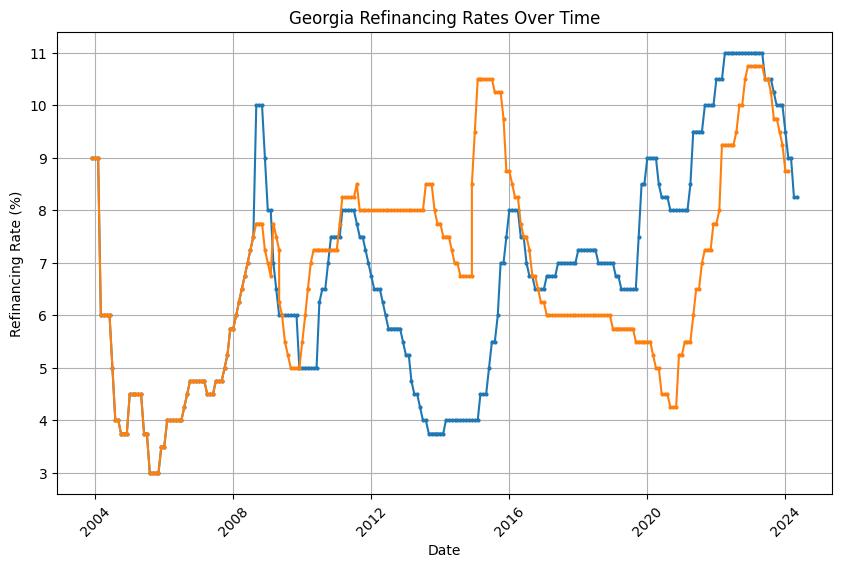

In [35]:
# Now proceed with plotting
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.plot(georgia_policy['Start_Date'], georgia_policy['Refinancing_Rates'], marker='o', linestyle='-', markersize=2)
plt.plot(refinancing_rate.index, refinancing_rate['Refinancing_Rates'], marker='o', linestyle='-', markersize=2)
plt.title('Georgia Refinancing Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Refinancing Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better readability

# Show the plot
plt.show()

In [36]:
# Convert 'Start_Date' to datetime
georgia_policy['Start_Date'] = pd.to_datetime(georgia_policy['Start_Date'])

# Set 'Start_Date' as index
georgia_policy.set_index('Start_Date', inplace=True)

# Create a full date range from start to end of your data, with monthly frequency
full_range = pd.date_range(start=georgia_policy.index.min(), end=georgia_policy.index.max(), freq='MS')

# Find missing months in your DataFrame
missing_months = full_range.difference(georgia_policy.index)

# Print missing months
print(missing_months)


DatetimeIndex([], dtype='datetime64[ns]', freq='MS')


In [37]:
#refinancing_rate = refinancing_rate.reset_index()

In [38]:
refinancing_rate

,Start_Date,Refinancing_Rates
0,2003-12-01,9.00
1,2004-01-01,9.00
2,2004-02-01,9.00
3,2004-03-01,6.00
4,2004-04-01,6.00
...,...,...
242,2023-10-01,9.75
243,2023-11-01,9.50
244,2023-12-01,9.25
245,2024-01-01,8.75


# dolarization

In [10]:
url = 'https://www.cba.am/stat/stat_data_eng/5_Deposits%20by%20sectors_eng.xlsx'

In [11]:
deposits = pd.read_excel(url)

print(deposits)

    COMMERCIAL BANKS DEPOSITS BY SECTORS OF ECONOMY 1           Unnamed: 1  \
0                            (end of period, mln AMD)                  NaN   
1                                                 NaN                  NaN   
2                                             Column1            Column110   
3                                                 NaN  2000-01-01 00:00:00   
4                                      Non Residents2         33613.476513   
5                                                  FX         31572.713943   
6                                                 AMD           2040.76257   
7                                           Residents         66613.842576   
8                                                 AMD         15730.223768   
9                Demand Deposits (including accounts)         11342.443363   
10                         Non-Financial Corporations          9484.700614   
11                                            Private          6

In [12]:
# Step 1: Extract years and values
years = deposits.iloc[3, 1:]  # Skip the first column which is a description, not a year
residents = deposits.iloc[7, 1:]  # Similarly, skip the description column
fx = deposits.iloc[25, 1:]

# Step 2: Create a new DataFrame with 'Year' and 'Total loans of banking system / GDP' as columns
deposits_new = pd.DataFrame({
    'Time_Period': years.values,  # Convert to array to ensure proper formatting
    'Residents': residents.values,  # Ditto
    'FX': fx.values
})

In [13]:
deposits_new

,Time_Period,Residents,FX
0,2000-01-01,66613.842576,50883.618809
1,2000-02-01,68854.367334,54183.320013
2,2000-03-01,73008.897743,56984.564361
3,2000-04-01,72366.141054,56525.324563
4,2000-05-01,73327.849158,57611.385772
...,...,...,...
285,2023-10-31,4202574.867869,1763710.10907
286,2023-11-30,4230840.320815,1756651.023428
287,2023-12-31,4320279.315355,1755887.26559
288,2024-01-31,4267342.85177,1744397.570658


In [14]:
deposits_new['Dolarization'] = deposits_new['Residents']/deposits_new['FX']
deposits_new = deposits_new.drop('FX', axis = 1)
deposits_new = deposits_new.drop('Residents', axis = 1)
deposits_new['Time_Period'] = pd.to_datetime(deposits_new['Time_Period'])
deposits_new['Dolarization'] = pd.to_numeric(deposits_new['Dolarization'])

In [15]:
deposits_new = deposits_new[deposits_new['Time_Period'] >= '2003-12-01']
deposits_new['Time_Period'] = deposits_new['Time_Period'].dt.to_period('M').dt.to_timestamp()

In [16]:
deposits_new

,Time_Period,Dolarization
47,2003-12-01,1.406075
48,2004-01-01,1.402145
49,2004-02-01,1.378638
50,2004-03-01,1.373693
51,2004-04-01,1.389632
...,...,...
285,2023-10-01,2.382804
286,2023-11-01,2.408469
287,2023-12-01,2.460454
288,2024-01-01,2.446313


In [17]:
refinancing_rate = refinancing_rate.reset_index()


#deposits_new.set_index('Time_Period', inplace=True)
#refinancing_rate.set_index('Start_Date', inplace=True)

In [18]:
refinancing_rate

,Start_Date,Refinancing_Rates
0,2003-12-01,9.00
1,2004-01-01,9.00
2,2004-02-01,9.00
3,2004-03-01,6.00
4,2004-04-01,6.00
...,...,...
242,2023-10-01,9.75
243,2023-11-01,9.50
244,2023-12-01,9.25
245,2024-01-01,8.75


In [19]:
deposits_new

,Time_Period,Dolarization
47,2003-12-01,1.406075
48,2004-01-01,1.402145
49,2004-02-01,1.378638
50,2004-03-01,1.373693
51,2004-04-01,1.389632
...,...,...
285,2023-10-01,2.382804
286,2023-11-01,2.408469
287,2023-12-01,2.460454
288,2024-01-01,2.446313


In [20]:
# Merging the DataFrames on their respective date columns
merged_df = pd.merge(refinancing_rate, deposits_new, left_on='Start_Date', right_on='Time_Period', how='outer')

# If you want to drop one of the date columns after merging, since they are redundant, you can do so. For example, to drop 'Time_Period':
merged_df.drop(columns='Start_Date', inplace=True)

In [21]:
merged_df

,Refinancing_Rates,Time_Period,Dolarization
0,9.00,2003-12-01,1.406075
1,9.00,2004-01-01,1.402145
2,9.00,2004-02-01,1.378638
3,6.00,2004-03-01,1.373693
4,6.00,2004-04-01,1.389632
...,...,...,...
242,9.75,2023-10-01,2.382804
243,9.50,2023-11-01,2.408469
244,9.25,2023-12-01,2.460454
245,8.75,2024-01-01,2.446313


In [22]:
# Assuming merged_df is your DataFrame
#merged_df = merged_df[:-1]

In [23]:
# Concatenate the DataFrames along the columns
data = pd.concat([refinancing_rate, deposits_new], axis = 1)

In [24]:
data = merged_df

In [25]:
print(data.columns)

Index(['Refinancing_Rates', 'Time_Period', 'Dolarization'], dtype='object')


In [26]:
#data = data.reset_index()
#data.rename(columns={'index': 'Time_Period'}, inplace=True)
#data = data.drop('level_0')

In [27]:
data

,Refinancing_Rates,Time_Period,Dolarization
0,9.00,2003-12-01,1.406075
1,9.00,2004-01-01,1.402145
2,9.00,2004-02-01,1.378638
3,6.00,2004-03-01,1.373693
4,6.00,2004-04-01,1.389632
...,...,...,...
242,9.75,2023-10-01,2.382804
243,9.50,2023-11-01,2.408469
244,9.25,2023-12-01,2.460454
245,8.75,2024-01-01,2.446313


# test

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [29]:
data['Time_Period'] = pd.to_datetime(data['Time_Period'])
data['Year'] = data['Time_Period'].dt.year
data['Month'] = data['Time_Period'].dt.month

In [30]:
# Prepare features and target variable
X = data[['Year', 'Month','Dolarization']]  # Add more features if needed
y = data['Refinancing_Rates']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 4.57
R-squared: 0.11


worse than expected continue to make the data bigger with features included 

In [31]:
print(data)

     Refinancing_Rates Time_Period  Dolarization  Year  Month
0                 9.00  2003-12-01      1.406075  2003     12
1                 9.00  2004-01-01      1.402145  2004      1
2                 9.00  2004-02-01      1.378638  2004      2
3                 6.00  2004-03-01      1.373693  2004      3
4                 6.00  2004-04-01      1.389632  2004      4
..                 ...         ...           ...   ...    ...
242               9.75  2023-10-01      2.382804  2023     10
243               9.50  2023-11-01      2.408469  2023     11
244               9.25  2023-12-01      2.460454  2023     12
245               8.75  2024-01-01      2.446313  2024      1
246               8.75  2024-02-01      2.449819  2024      2

[247 rows x 5 columns]


# core_infaltion

In [32]:
core_inflation = pd.read_excel("https://www.cba.am/stat/stat_data_eng/core_inflation_CBA_eng.xlsx")

# Display the data
print(core_inflation)

    Unnamed: 0                                     CORE INFLATION  \
0          NaN  Seasonal Products &\nAdministrative Regulated ...   
1          NaN    compared to the same month of the previous year   
2       2006/1                                           98.59481   
3       2006/2                                          99.083378   
4       2006/3                                           99.60412   
..         ...                                                ...   
219     2024/2                                          99.345842   
220        NaN                                                NaN   
221          *  currently this indicator is being used for CBA...   
222         **  this indicator is being used for other analyti...   
223        ***  due to consumer basket weights review by SC RA...   

                         Unnamed: 2  \
0                               NaN   
1    compared to the previous month   
2                        100.291715   
3              

In [33]:
core_inflation = core_inflation.iloc[:, [0, 1, 3]]

print(core_inflation)

    Unnamed: 0                                     CORE INFLATION  \
0          NaN  Seasonal Products &\nAdministrative Regulated ...   
1          NaN    compared to the same month of the previous year   
2       2006/1                                           98.59481   
3       2006/2                                          99.083378   
4       2006/3                                           99.60412   
..         ...                                                ...   
219     2024/2                                          99.345842   
220        NaN                                                NaN   
221          *  currently this indicator is being used for CBA...   
222         **  this indicator is being used for other analyti...   
223        ***  due to consumer basket weights review by SC RA...   

                                          Unnamed: 3  
0                    Exclusion & Adjustment method**  
1    compared to the same month of the previous year  
2     

In [34]:
core_inflation.dropna(inplace=True)

print(core_inflation)

    Unnamed: 0 CORE INFLATION  Unnamed: 3
2       2006/1       98.59481   98.743545
3       2006/2      99.083378   99.101892
4       2006/3       99.60412   99.447619
5       2006/4     101.191824  100.872023
6       2006/5     102.216325  101.712238
..         ...            ...         ...
215    2023/10      99.953496  101.197253
216    2023/11      99.756096  100.990389
217    2023/12      99.606461  100.704472
218  2024/1***      99.559165  100.500455
219     2024/2      99.345842  100.132493

[218 rows x 3 columns]


In [35]:
core_inflation.rename(columns={'Unnamed: 0': 'Time_Period', 'CORE INFLATION': 'Core_Inflation_1', 'Unnamed: 3': 'Core_Inflation_2'}, inplace=True)

print(core_inflation)

    Time_Period Core_Inflation_1 Core_Inflation_2
2        2006/1         98.59481        98.743545
3        2006/2        99.083378        99.101892
4        2006/3         99.60412        99.447619
5        2006/4       101.191824       100.872023
6        2006/5       102.216325       101.712238
..          ...              ...              ...
215     2023/10        99.953496       101.197253
216     2023/11        99.756096       100.990389
217     2023/12        99.606461       100.704472
218   2024/1***        99.559165       100.500455
219      2024/2        99.345842       100.132493

[218 rows x 3 columns]


In [36]:
core_inflation['Core_Inflation_1'] = core_inflation['Core_Inflation_1']-100
core_inflation['Core_Inflation_2'] = core_inflation['Core_Inflation_2']-100

print(core_inflation)

    Time_Period Core_Inflation_1 Core_Inflation_2
2        2006/1         -1.40519        -1.256455
3        2006/2        -0.916622        -0.898108
4        2006/3         -0.39588        -0.552381
5        2006/4         1.191824         0.872023
6        2006/5         2.216325         1.712238
..          ...              ...              ...
215     2023/10        -0.046504         1.197253
216     2023/11        -0.243904         0.990389
217     2023/12        -0.393539         0.704472
218   2024/1***        -0.440835         0.500455
219      2024/2        -0.654158         0.132493

[218 rows x 3 columns]


In [37]:
# Convert 'Time_Period' to datetime format if it's not already
core_inflation['Time_Period'] = core_inflation['Time_Period'].str.replace('\*\*\*', '', regex=True)

core_inflation['Time_Period'] = pd.to_datetime(core_inflation['Time_Period'])



/var/folders/b_/7pbwf7sn5b77t2qtkgd5s3b80000gn/T/ipykernel_20286/2589275459.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  core_inflation['Time_Period'] = pd.to_datetime(core_inflation['Time_Period'])


In [38]:
print(core_inflation)

    Time_Period Core_Inflation_1 Core_Inflation_2
2    2006-01-01         -1.40519        -1.256455
3    2006-02-01        -0.916622        -0.898108
4    2006-03-01         -0.39588        -0.552381
5    2006-04-01         1.191824         0.872023
6    2006-05-01         2.216325         1.712238
..          ...              ...              ...
215  2023-10-01        -0.046504         1.197253
216  2023-11-01        -0.243904         0.990389
217  2023-12-01        -0.393539         0.704472
218  2024-01-01        -0.440835         0.500455
219  2024-02-01        -0.654158         0.132493

[218 rows x 3 columns]


In [39]:
# Filter the DataFrame to include only rows on or after 2006-01-01
#filtered_data = data[data['Time_Period'] >= pd.Timestamp('2006-01-01')]

In [40]:
filtered_data = data


filtered_data



,Refinancing_Rates,Time_Period,Dolarization,Year,Month
0,9.00,2003-12-01,1.406075,2003,12
1,9.00,2004-01-01,1.402145,2004,1
2,9.00,2004-02-01,1.378638,2004,2
3,6.00,2004-03-01,1.373693,2004,3
4,6.00,2004-04-01,1.389632,2004,4
...,...,...,...,...,...
242,9.75,2023-10-01,2.382804,2023,10
243,9.50,2023-11-01,2.408469,2023,11
244,9.25,2023-12-01,2.460454,2023,12
245,8.75,2024-01-01,2.446313,2024,1


In [41]:
# Merge core_inflation into filtered_data based on a common key (assuming 'Time_Period' is that key and exists in both)
#filtered_data = filtered_data.merge(core_inflation[['Time_Period', 'Core_Inflation_1', 'Core_Inflation_2']], on='Time_Period', how='left')


In [42]:
filtered_data

,Refinancing_Rates,Time_Period,Dolarization,Year,Month
0,9.00,2003-12-01,1.406075,2003,12
1,9.00,2004-01-01,1.402145,2004,1
2,9.00,2004-02-01,1.378638,2004,2
3,6.00,2004-03-01,1.373693,2004,3
4,6.00,2004-04-01,1.389632,2004,4
...,...,...,...,...,...
242,9.75,2023-10-01,2.382804,2023,10
243,9.50,2023-11-01,2.408469,2023,11
244,9.25,2023-12-01,2.460454,2023,12
245,8.75,2024-01-01,2.446313,2024,1


# test 1

# Prepare features and target variable
X = filtered_data[['Year', 'Month','Core_Inflation_1', 'Core_Inflation_2']]  # Add more features if needed
y = filtered_data['Refinancing_Rates']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

better with core inflation

# consumer_price_index

In [43]:
consumer_price_index = pd.read_excel("https://www.cba.am/stat/stat_data_eng/6_CPI_eng.xls")

# Display the data
print(consumer_price_index)

                     Consumer price index (monthly), %  \
0                                                  NaN   
1                                                  NaN   
2                                                  NaN   
3                                               1996/1   
4                                               1996/2   
..                                                 ...   
339                                            2024/1*   
340                                             2024/2   
341                                                NaN   
342  Source: Statistical Committee of the Republic ...   
343  *based on the revised weights of the consumpti...   

                         Unnamed: 1  \
0                               NaN   
1    Compared to the previous month   
2                               CPI   
3                            103.61   
4                        103.378052   
..                              ...   
339                      101.1

In [44]:
consumer_price_index = consumer_price_index.iloc[:, [0, 8]]

print(consumer_price_index)

                     Consumer price index (monthly), %  \
0                                                  NaN   
1                                                  NaN   
2                                                  NaN   
3                                               1996/1   
4                                               1996/2   
..                                                 ...   
339                                            2024/1*   
340                                             2024/2   
341                                                NaN   
342  Source: Statistical Committee of the Republic ...   
343  *based on the revised weights of the consumpti...   

                                            Unnamed: 8  
0                                                  NaN  
1                                                  NaN  
2    CPI, compared to the same period of the previo...  
3                                           131.788907  
4                 

In [45]:
consumer_price_index.dropna(inplace=True)

print(consumer_price_index)

    Consumer price index (monthly), %  Unnamed: 8
3                              1996/1  131.788907
4                              1996/2  133.518896
5                              1996/3  133.619388
6                              1996/4  131.187826
7                              1996/5  127.697011
..                                ...         ...
336                           2023/10  102.502362
337                           2023/11  102.224546
338                           2023/12  101.980419
339                           2024/1*   99.140456
340                            2024/2   98.744512

[338 rows x 2 columns]


In [46]:
consumer_price_index.rename(columns={'Consumer price index (monthly), %': 'Time_Period', 'Unnamed: 8': 'CPI'}, inplace=True)

print(consumer_price_index)

    Time_Period         CPI
3        1996/1  131.788907
4        1996/2  133.518896
5        1996/3  133.619388
6        1996/4  131.187826
7        1996/5  127.697011
..          ...         ...
336     2023/10  102.502362
337     2023/11  102.224546
338     2023/12  101.980419
339     2024/1*   99.140456
340      2024/2   98.744512

[338 rows x 2 columns]


In [47]:
consumer_price_index['CPI'] = consumer_price_index['CPI']-100

print(consumer_price_index)

    Time_Period        CPI
3        1996/1  31.788907
4        1996/2  33.518896
5        1996/3  33.619388
6        1996/4  31.187826
7        1996/5  27.697011
..          ...        ...
336     2023/10   2.502362
337     2023/11   2.224546
338     2023/12   1.980419
339     2024/1*  -0.859544
340      2024/2  -1.255488

[338 rows x 2 columns]


In [48]:
# Convert 'Time_Period' to datetime format if it's not already
consumer_price_index['Time_Period'] = consumer_price_index['Time_Period'].str.replace('\*', '', regex=True)

consumer_price_index['Time_Period'] = pd.to_datetime(consumer_price_index['Time_Period'])

print(consumer_price_index)

    Time_Period        CPI
3    1996-01-01  31.788907
4    1996-02-01  33.518896
5    1996-03-01  33.619388
6    1996-04-01  31.187826
7    1996-05-01  27.697011
..          ...        ...
336  2023-10-01   2.502362
337  2023-11-01   2.224546
338  2023-12-01   1.980419
339  2024-01-01  -0.859544
340  2024-02-01  -1.255488

[338 rows x 2 columns]


/var/folders/b_/7pbwf7sn5b77t2qtkgd5s3b80000gn/T/ipykernel_20286/3127427907.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  consumer_price_index['Time_Period'] = pd.to_datetime(consumer_price_index['Time_Period'])


In [49]:
# Filter the DataFrame to include only rows on or after 2006-01-01
filtered_consumer_price_index = consumer_price_index[consumer_price_index['Time_Period'] >= pd.Timestamp('2003-12-01')]

print(filtered_consumer_price_index)

    Time_Period       CPI
98   2003-12-01  4.721553
99   2004-01-01  6.914182
100  2004-02-01   7.43394
101  2004-03-01  7.870907
102  2004-04-01  7.878875
..          ...       ...
336  2023-10-01  2.502362
337  2023-11-01  2.224546
338  2023-12-01  1.980419
339  2024-01-01 -0.859544
340  2024-02-01 -1.255488

[243 rows x 2 columns]


In [50]:
filtered_consumer_price_index['CPI'] = pd.to_numeric(filtered_consumer_price_index['CPI'], errors='coerce')


/var/folders/b_/7pbwf7sn5b77t2qtkgd5s3b80000gn/T/ipykernel_20286/964548041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_consumer_price_index['CPI'] = pd.to_numeric(filtered_consumer_price_index['CPI'], errors='coerce')


In [51]:
filtered_consumer_price_index

,Time_Period,CPI
98,2003-12-01,4.721553
99,2004-01-01,6.914182
100,2004-02-01,7.433940
101,2004-03-01,7.870907
102,2004-04-01,7.878875
...,...,...
336,2023-10-01,2.502362
337,2023-11-01,2.224546
338,2023-12-01,1.980419
339,2024-01-01,-0.859544


In [52]:
# Merge core_inflation into filtered_data based on a common key (assuming 'Time_Period' is that key and exists in both)
filtered_data = filtered_data.merge(consumer_price_index[['Time_Period', 'CPI']], on='Time_Period', how='left')


In [53]:
filtered_data

,Refinancing_Rates,Time_Period,Dolarization,Year,Month,CPI
0,9.00,2003-12-01,1.406075,2003,12,4.721553
1,9.00,2004-01-01,1.402145,2004,1,6.914182
2,9.00,2004-02-01,1.378638,2004,2,7.43394
3,6.00,2004-03-01,1.373693,2004,3,7.870907
4,6.00,2004-04-01,1.389632,2004,4,7.878875
...,...,...,...,...,...,...
242,9.75,2023-10-01,2.382804,2023,10,2.502362
243,9.50,2023-11-01,2.408469,2023,11,2.224546
244,9.25,2023-12-01,2.460454,2023,12,1.980419
245,8.75,2024-01-01,2.446313,2024,1,-0.859544


In [54]:
# Prepare features and target variable
X = filtered_data[['Year', 'Month','CPI']]  # Add more features if needed
y = filtered_data['Refinancing_Rates']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 4.41
R-squared: 0.15


In [55]:
bank_gdp = pd.read_excel("https://www.cba.am/Storage/EN/stat_data_eng/Banks-GDP-Eng.xls")

# Display the data
print(bank_gdp)

   Unnamed: 0                            Unnamed: 1   Unnamed: 2   Unnamed: 3  \
0         NaN                                     %  2000.000000  2001.000000   
1         NaN  Total assets of banking system / GDP    22.789411    19.778436   
2         NaN    Total loans of banking system /GDP     9.622451     7.112804   

    Unnamed: 4   Unnamed: 5   Unnamed: 6   Unnamed: 7   Unnamed: 8  \
0  2002.000000  2003.000000  2004.000000  2005.000000  2006.000000   
1    18.394429    17.635792    19.055448    19.647684    19.746988   
2     6.666744     6.618765     7.521472     8.702935     9.170270   

    Unnamed: 9  ...  Unnamed: 15  Unnamed: 16  Unnamed: 17  Unnamed: 18  \
0  2007.000000  ...  2013.000000  2014.000000  2015.000000  2016.000000   
1    24.274071  ...    68.985040    70.277401    68.491130    78.673023   
2    13.531658  ...    42.145291    42.725805    39.837822    45.768753   

   Unnamed: 19  Unnamed: 20  Unnamed: 21  Unnamed: 22  Unnamed: 23  \
0  2017.000000   2018.0

In [56]:
# Step 1: Extract years and values
years = bank_gdp.iloc[0, 1:]  # Skip the first column which is a description, not a year
values = bank_gdp.iloc[2, 1:]  # Similarly, skip the description column

# Step 2: Create a new DataFrame with 'Year' and 'Total loans of banking system / GDP' as columns
bank_gdp = pd.DataFrame({
    'Time_Period': years.values,  # Convert to array to ensure proper formatting
    'Total loans of banking system / GDP': values.values  # Ditto
})

In [57]:
bank_gdp

,Time_Period,Total loans of banking system / GDP
0,%,Total loans of banking system /GDP
1,2000.0,9.622451
2,2001.0,7.112804
3,2002.0,6.666744
4,2003.0,6.618765
5,2004.0,7.521472
6,2005.0,8.702935
7,2006.0,9.17027
8,2007.0,13.531658
9,2008.0,17.781802


In [58]:
bank_gdp = bank_gdp.drop(0)

In [59]:
bank_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 1 to 23
Data columns (total 2 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Time_Period                          23 non-null     object
 1   Total loans of banking system / GDP  23 non-null     object
dtypes: object(2)
memory usage: 500.0+ bytes


In [60]:
bank_gdp['Time_Period'] = pd.to_datetime(bank_gdp['Time_Period'].astype(int).astype(str) + '-01-01')

In [61]:
bank_gdp

,Time_Period,Total loans of banking system / GDP
1,2000-01-01,9.622451
2,2001-01-01,7.112804
3,2002-01-01,6.666744
4,2003-01-01,6.618765
5,2004-01-01,7.521472
6,2005-01-01,8.702935
7,2006-01-01,9.17027
8,2007-01-01,13.531658
9,2008-01-01,17.781802
10,2009-01-01,23.401706


In [62]:
expanded_bank_gdp = pd.DataFrame()

# Iterate over each row in bank_gdp to create 12 entries for each month of the year, duplicating the GDP values
for index, row in bank_gdp.iterrows():
    # Create a DataFrame for this row for each month
    year_df = pd.DataFrame({
        'Time_Period': pd.date_range(start=f"{row['Time_Period'].year}-01-01", periods=12, freq='MS'),
        'Total loans of banking system / GDP': row['Total loans of banking system / GDP']
    })
    # Append to the expanded DataFrame
    expanded_bank_gdp = pd.concat([expanded_bank_gdp, year_df], ignore_index=True)
    
expanded_bank_gdp

,Time_Period,Total loans of banking system / GDP
0,2000-01-01,9.622451
1,2000-02-01,9.622451
2,2000-03-01,9.622451
3,2000-04-01,9.622451
4,2000-05-01,9.622451
...,...,...
271,2022-08-01,45.930812
272,2022-09-01,45.930812
273,2022-10-01,45.930812
274,2022-11-01,45.930812


In [63]:
# Filter the DataFrame to include only rows on or after 2006-01-01
bank_gdp = expanded_bank_gdp[expanded_bank_gdp['Time_Period'] >= pd.Timestamp('2003-12-01')]

In [64]:
bank_gdp

,Time_Period,Total loans of banking system / GDP
47,2003-12-01,6.618765
48,2004-01-01,7.521472
49,2004-02-01,7.521472
50,2004-03-01,7.521472
51,2004-04-01,7.521472
...,...,...
271,2022-08-01,45.930812
272,2022-09-01,45.930812
273,2022-10-01,45.930812
274,2022-11-01,45.930812


In [65]:
# Merge core_inflation into filtered_data based on a common key (assuming 'Time_Period' is that key and exists in both)
filtered_data = filtered_data.merge(bank_gdp[['Time_Period', 'Total loans of banking system / GDP']], on='Time_Period', how='left')

In [66]:
filtered_data

,Refinancing_Rates,Time_Period,Dolarization,Year,Month,CPI,Total loans of banking system / GDP
0,9.00,2003-12-01,1.406075,2003,12,4.721553,6.618765
1,9.00,2004-01-01,1.402145,2004,1,6.914182,7.521472
2,9.00,2004-02-01,1.378638,2004,2,7.43394,7.521472
3,6.00,2004-03-01,1.373693,2004,3,7.870907,7.521472
4,6.00,2004-04-01,1.389632,2004,4,7.878875,7.521472
...,...,...,...,...,...,...,...
242,9.75,2023-10-01,2.382804,2023,10,2.502362,NaN
243,9.50,2023-11-01,2.408469,2023,11,2.224546,NaN
244,9.25,2023-12-01,2.460454,2023,12,1.980419,NaN
245,8.75,2024-01-01,2.446313,2024,1,-0.859544,NaN


In [67]:
# Ensure 'Time_Period' is in datetime format
filtered_data['Time_Period'] = pd.to_datetime(filtered_data['Time_Period'])
filtered_data['Year'] = filtered_data['Time_Period'].dt.year

# Initialize a variable to hold the last known value (start with NaN and update as you find non-NaN values)
last_known_value = np.nan

# Iterate through each year in the DataFrame
for year in range(filtered_data['Year'].min(), filtered_data['Year'].max() + 1):
    # Check if there are NaN values for "Total loans of banking system / GDP" in the current year
    if filtered_data.loc[filtered_data['Year'] == year, 'Total loans of banking system / GDP'].isna().any():
        # If there's a last known value from a previous year, use it to fill NaNs for the current year
        if not np.isnan(last_known_value):
            filtered_data.loc[filtered_data['Year'] == year, 'Total loans of banking system / GDP'] = filtered_data.loc[filtered_data['Year'] == year, 'Total loans of banking system / GDP'].fillna(last_known_value)
    else:
        # Update the last known value with the last non-NaN value of the current year
        last_known_value = filtered_data.loc[filtered_data['Year'] == year, 'Total loans of banking system / GDP'].dropna().values[-1]

In [68]:
filtered_data

,Refinancing_Rates,Time_Period,Dolarization,Year,Month,CPI,Total loans of banking system / GDP
0,9.00,2003-12-01,1.406075,2003,12,4.721553,6.618765
1,9.00,2004-01-01,1.402145,2004,1,6.914182,7.521472
2,9.00,2004-02-01,1.378638,2004,2,7.43394,7.521472
3,6.00,2004-03-01,1.373693,2004,3,7.870907,7.521472
4,6.00,2004-04-01,1.389632,2004,4,7.878875,7.521472
...,...,...,...,...,...,...,...
242,9.75,2023-10-01,2.382804,2023,10,2.502362,45.930812
243,9.50,2023-11-01,2.408469,2023,11,2.224546,45.930812
244,9.25,2023-12-01,2.460454,2023,12,1.980419,45.930812
245,8.75,2024-01-01,2.446313,2024,1,-0.859544,45.930812


In [69]:
# Prepare features and target variable
X = filtered_data[['Total loans of banking system / GDP']]  # Add more features if needed
y = filtered_data['Refinancing_Rates']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 6.98
R-squared: -0.35


In [70]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Refinancing_Rates                    247 non-null    float64       
 1   Time_Period                          247 non-null    datetime64[ns]
 2   Dolarization                         247 non-null    float64       
 3   Year                                 247 non-null    int32         
 4   Month                                247 non-null    int32         
 5   CPI                                  247 non-null    object        
 6   Total loans of banking system / GDP  247 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int32(2), object(1)
memory usage: 11.7+ KB


In [71]:
filtered_data['Dolarization'] = filtered_data['Dolarization'].astype(float)
#filtered_data['Core_Inflation_1'] = filtered_data['Core_Inflation_1'].astype(float)
#filtered_data['Core_Inflation_2'] = filtered_data['Core_Inflation_2'].astype(float)
filtered_data['CPI'] = filtered_data['CPI'].astype(float)

In [72]:
# Prepare features and target variable
X = filtered_data[['Year','Month','CPI']]  # Add more features if needed
y = filtered_data['Refinancing_Rates']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 4.41
R-squared: 0.15


In [73]:
data = filtered_data

In [74]:
data

,Refinancing_Rates,Time_Period,Dolarization,Year,Month,CPI,Total loans of banking system / GDP
0,9.00,2003-12-01,1.406075,2003,12,4.721553,6.618765
1,9.00,2004-01-01,1.402145,2004,1,6.914182,7.521472
2,9.00,2004-02-01,1.378638,2004,2,7.433940,7.521472
3,6.00,2004-03-01,1.373693,2004,3,7.870907,7.521472
4,6.00,2004-04-01,1.389632,2004,4,7.878875,7.521472
...,...,...,...,...,...,...,...
242,9.75,2023-10-01,2.382804,2023,10,2.502362,45.930812
243,9.50,2023-11-01,2.408469,2023,11,2.224546,45.930812
244,9.25,2023-12-01,2.460454,2023,12,1.980419,45.930812
245,8.75,2024-01-01,2.446313,2024,1,-0.859544,45.930812


# best model so far

In [75]:
international_reserves = pd.read_excel("https://www.cba.am/stat/stat_data_eng/International_Reserves_eng.xls")

# Display the data
print(international_reserves)

                             INTERNATIONAL RESERVES 1    Unnamed: 1  \
0                                     (end of period)           NaN   
1                                                 NaN           NaN   
2                                                 NaN           NaN   
3                        Gross international reserves  USD millions   
4                           Foreign currency reserves           NaN   
5                                IMF reserve position           NaN   
6                                                SDRs           NaN   
7                                                Gold           NaN   
8                                Other reserve assets           NaN   
9                                                 NaN           NaN   
10                       Gross international reserves  AMD billions   
11                          Foreign currency reserves           NaN   
12                               IMF reserve position           NaN   
13    

In [76]:
# Step 1: Extract years and values
years = international_reserves.iloc[2, 2:]  # Skip the first column which is a description, not a year
values = international_reserves.iloc[10, 2:]  # Similarly, skip the description column

print(years)
print(values)

Unnamed: 2                 Dec-11 2
Unnamed: 3      2012-01-01 00:00:00
Unnamed: 4      2012-02-01 00:00:00
Unnamed: 5                 Mar-12 2
Unnamed: 6      2012-04-01 00:00:00
                       ...         
Unnamed: 144    2023-10-01 00:00:00
Unnamed: 145    2023-11-01 00:00:00
Unnamed: 146               Dec-23 3
Unnamed: 147    2024-01-01 00:00:00
Unnamed: 148    2024-02-01 00:00:00
Name: 2, Length: 147, dtype: object
Unnamed: 2       745.491286
Unnamed: 3       669.316371
Unnamed: 4       683.477239
Unnamed: 5       669.641387
Unnamed: 6       661.930524
                   ...     
Unnamed: 144    1536.565178
Unnamed: 145    1463.795616
Unnamed: 146    1458.020163
Unnamed: 147    1443.429674
Unnamed: 148    1366.425204
Name: 10, Length: 147, dtype: object


In [77]:
# Step 2: Create a new DataFrame with 'Year' and 'Total loans of banking system / GDP' as columns
international_reserves = pd.DataFrame({
    'Time_Period': years.values,  # Convert to array to ensure proper formatting
    'International reserves in billion AMD': values.values  # Ditto
})

In [78]:
international_reserves

,Time_Period,International reserves in billion AMD
0,Dec-11 2,745.491286
1,2012-01-01 00:00:00,669.316371
2,2012-02-01 00:00:00,683.477239
3,Mar-12 2,669.641387
4,2012-04-01 00:00:00,661.930524
...,...,...
142,2023-10-01 00:00:00,1536.565178
143,2023-11-01 00:00:00,1463.795616
144,Dec-23 3,1458.020163
145,2024-01-01 00:00:00,1443.429674


In [79]:
international_reserves.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 2 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Time_Period                            147 non-null    object
 1   International reserves in billion AMD  147 non-null    object
dtypes: object(2)
memory usage: 2.4+ KB


In [80]:
international_reserves['International reserves in billion AMD'] = international_reserves['International reserves in billion AMD'].astype(float)


In [81]:
# Function to handle mixed types in 'Time_Period' and standardize to datetime format
def standardize_date(date_entry):
    if isinstance(date_entry, str):  # Check if the entry is a string
        # Attempt to split and format based on expected non-standard formats
        try:
            # Split if there's a space and take the first part, then convert to datetime
            date_str = date_entry.split(' ')[0]
            if '-' in date_str and len(date_str) <= 7:  # Expected to catch 'Dec-11' like formats
                return pd.to_datetime(date_str, format='%b-%y')
            else:
                return pd.to_datetime(date_str)  # Handle other string representations
        except ValueError:
            # Log or handle dates that couldn't be parsed
            return pd.NaT
    elif isinstance(date_entry, pd.Timestamp):
        return date_entry  # If already a Timestamp, no conversion needed
    else:
        return date_entry  # For any other types not accounted for

# Apply the function to the 'Time_Period' column to standardize all entries to datetime
international_reserves['Time_Period'] = international_reserves['Time_Period'].apply(standardize_date)

# Print the updated DataFrame to verify changes
print(international_reserves)

    Time_Period  International reserves in billion AMD
0    2011-12-01                             745.491286
1    2012-01-01                             669.316371
2    2012-02-01                             683.477239
3    2012-03-01                             669.641387
4    2012-04-01                             661.930524
..          ...                                    ...
142  2023-10-01                            1536.565178
143  2023-11-01                            1463.795616
144  2023-12-01                            1458.020163
145  2024-01-01                            1443.429674
146  2024-02-01                            1366.425204

[147 rows x 2 columns]


In [82]:
filtered_data = filtered_data[filtered_data['Time_Period'] >= pd.Timestamp('2011-12-01')]

# Merge core_inflation into filtered_data based on a common key (assuming 'Time_Period' is that key and exists in both)
filtered_data = filtered_data.merge(international_reserves[['Time_Period', 'International reserves in billion AMD']], on='Time_Period', how='left')

In [83]:
filtered_data

,Refinancing_Rates,Time_Period,Dolarization,Year,Month,CPI,Total loans of banking system / GDP,International reserves in billion AMD
0,8.00,2011-12-01,1.637836,2011,12,7.650008,33.642768,745.491286
1,8.00,2012-01-01,1.604587,2012,1,4.823360,40.165779,669.316371
2,8.00,2012-02-01,1.617768,2012,2,3.896812,40.165779,683.477239
3,8.00,2012-03-01,1.649819,2012,3,3.340136,40.165779,669.641387
4,8.00,2012-04-01,1.635872,2012,4,2.972043,40.165779,661.930524
...,...,...,...,...,...,...,...,...
144,9.75,2023-10-01,2.382804,2023,10,2.502362,45.930812,1536.565178
145,9.50,2023-11-01,2.408469,2023,11,2.224546,45.930812,1463.795616
146,9.25,2023-12-01,2.460454,2023,12,1.980419,45.930812,1458.020163
147,8.75,2024-01-01,2.446313,2024,1,-0.859544,45.930812,1443.429674


In [84]:
# Prepare features and target variable
X = filtered_data[['Year','Month','International reserves in billion AMD']]  # Add more features if needed
y = filtered_data['Refinancing_Rates']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 26.33
R-squared: -19.52


In [85]:
international_reserves_total = pd.read_excel("https://www.cba.am/stat/stat_data_eng/7.International%20reserves_eng.xlsx")

# Display the data
print(international_reserves_total)

                             International Reserves 1           Unnamed: 1  \
0                                       (million USD)                  NaN   
1                                                 NaN                  NaN   
2                                                 NaN  2003-01-01 00:00:00   
3   Gross International Reserves (excluding privat...              421.399   
4                        Gross International Reserves           431.003714   
5                                                Gold            16.304434   
6                                        SDR holdings            26.372314   
7                         Reserve position in the IMF                    0   
8                                  Foreign Exchange 2           388.326965   
9                                                 NaN                  NaN   
10             1 Calculated at actual exchange rates.                  NaN   
11       2 Includes assets in convertible currencies.           

/Users/zhorastepanyan/opt/anaconda3/lib/python3.9/site-packages/openpyxl/reader/workbook.py:118: UserWarning: Print area cannot be set to Defined name: Reserve_actual!$1:$1048576.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


In [86]:
data

,Refinancing_Rates,Time_Period,Dolarization,Year,Month,CPI,Total loans of banking system / GDP
0,9.00,2003-12-01,1.406075,2003,12,4.721553,6.618765
1,9.00,2004-01-01,1.402145,2004,1,6.914182,7.521472
2,9.00,2004-02-01,1.378638,2004,2,7.433940,7.521472
3,6.00,2004-03-01,1.373693,2004,3,7.870907,7.521472
4,6.00,2004-04-01,1.389632,2004,4,7.878875,7.521472
...,...,...,...,...,...,...,...
242,9.75,2023-10-01,2.382804,2023,10,2.502362,45.930812
243,9.50,2023-11-01,2.408469,2023,11,2.224546,45.930812
244,9.25,2023-12-01,2.460454,2023,12,1.980419,45.930812
245,8.75,2024-01-01,2.446313,2024,1,-0.859544,45.930812


In [87]:
data.isnull().sum().sum()

0

In [88]:
#data = data[['Refinancing_Rates','Year','Month','Dolarization','CPI']]

In [89]:
data

,Refinancing_Rates,Time_Period,Dolarization,Year,Month,CPI,Total loans of banking system / GDP
0,9.00,2003-12-01,1.406075,2003,12,4.721553,6.618765
1,9.00,2004-01-01,1.402145,2004,1,6.914182,7.521472
2,9.00,2004-02-01,1.378638,2004,2,7.433940,7.521472
3,6.00,2004-03-01,1.373693,2004,3,7.870907,7.521472
4,6.00,2004-04-01,1.389632,2004,4,7.878875,7.521472
...,...,...,...,...,...,...,...
242,9.75,2023-10-01,2.382804,2023,10,2.502362,45.930812
243,9.50,2023-11-01,2.408469,2023,11,2.224546,45.930812
244,9.25,2023-12-01,2.460454,2023,12,1.980419,45.930812
245,8.75,2024-01-01,2.446313,2024,1,-0.859544,45.930812


In [90]:
#model_test

data = data[data['Time_Period'] <= pd.Timestamp('2010-01-01')]

data

,Refinancing_Rates,Time_Period,Dolarization,Year,Month,CPI,Total loans of banking system / GDP
0,9.0,2003-12-01,1.406075,2003,12,4.721553,6.618765
1,9.0,2004-01-01,1.402145,2004,1,6.914182,7.521472
2,9.0,2004-02-01,1.378638,2004,2,7.433940,7.521472
3,6.0,2004-03-01,1.373693,2004,3,7.870907,7.521472
4,6.0,2004-04-01,1.389632,2004,4,7.878875,7.521472
...,...,...,...,...,...,...,...
70,5.0,2009-09-01,1.518429,2009,9,2.915739,23.401706
71,5.0,2009-10-01,1.505946,2009,10,2.975444,23.401706
72,5.0,2009-11-01,1.486696,2009,11,3.123517,23.401706
73,5.0,2009-12-01,1.457140,2009,12,3.405874,23.401706


In [91]:
import h2o
from h2o.automl import H2OAutoML
import xgboost

# Initialize H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,4 days 22 hours 36 mins
H2O_cluster_timezone:,Asia/Yerevan
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,13 days
H2O_cluster_name:,H2O_from_python_zhorastepanyan_d9fb80
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.845 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [92]:
data = h2o.H2OFrame(data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [93]:
# Assume 'data' is your H2OFrame and 'Time_Period' is the column with the date information.
# First, sort the H2OFrame by 'Time_Period'
data = data.sort(by='Time_Period')

# Determine the split point for an 80/20 train/test split
split_point = int(data.nrow * 0.8)

# Split the data into train and test sets
# The `head` and `tail` methods in H2O allow us to split the data without shuffling
train = data.head(rows=split_point)
test = data.tail(rows=data.nrow - split_point)

# Now, set up the features and target for your model
# Assuming 'Refinancing_Rates' is the column you want to predict
y = "Refinancing_Rates"
x = data.columns
x.remove(y)
#x.remove('Time_Period') # Remove the Time_Period column if it's not a feature

# Convert the target variable to numeric if it's recognized as a factor
train[y] = train[y].asnumeric()
test[y] = test[y].asnumeric()

# Set up and run the AutoML
aml = H2OAutoML(max_models=20, seed=1, sort_metric="RMSE")
aml.train(x=x, y=y, training_frame=train)

# After training, you can view the leaderboard and make predictions
lb = aml.leaderboard
print(lb.head(rows=lb.nrows))  # Print the entire leaderboard

# To make predictions on the test set
preds = aml.leader.predict(test)

AutoML progress: |
21:02:23.412: AutoML: XGBoost is not available; skipping it.
21:02:23.490: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 60.0.

███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                      rmse       mse       mae      rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_1_AutoML_12_20240326_210223  0.507361  0.257415  0.343263  0.0766993                  0.257415
DeepLearning_grid_1_AutoML_12_20240326_210223_model_3     0.542855  0.294692  0.385572  0.0808227                  0.294692
StackedEnsemble_AllModels_1_AutoML_12_20240326_210223     0.557843  0.311189  0.30959   0.0799638                  0.311189
DeepLearning_grid_3_AutoML_12_20240326_210223_model_1     0.59294   0.351578  0.296779  0.0797473                  0.351578
DeepLearning_grid_2_AutoML_12_20240326_210223_model_1     0.635614  0.

In [94]:
preds

predict
7.55524
12.3602
13.676
14.2622
14.1629
14.0875
14.0875
14.0773
14.2022
14.1452


# Assuming your preprocessed dataset is loaded into H2O as `data`
# If your dataset is in a CSV file, you can use:
# data = h2o.import_file("path_to_your_preprocessed_dataset.csv")

# Splitting the dataset into train and test sets
# Ensure this split is temporal if working with time series data
train, test = data.split_frame(ratios=[.95], seed=1234)

train_df = train.as_data_frame()

train_df.isnull().sum().sum()



test

# Setting the target and features
y = "Refinancing_Rates"
x = data.columns
x.remove(y)
# Make sure to exclude any other columns that should not be used as features
# e.g., x.remove('Time_Period')

# For regression, ensure the target is not treated as a categorical variable
# (H2O automatically treats strings and enums as categorical)
if train[y].isfactor():
    train[y] = train[y].asnumeric()
if test[y].isfactor():
    test[y] = test[y].asnumeric()

# Run AutoML
aml = H2OAutoML(max_models=20, seed=1, sort_metric="RMSE")
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
print(lb.head(rows=lb.nrows))  # Prints the entire leaderboard

# The leader model can be accessed via aml.leader
# To make predictions:
# predictions = aml.leader.predict(test)


# To generate predictions on a test set, you can make predictions
# directly on the `H2OAutoML` object or on the leader model
# object directly
preds = aml.predict(test)

# or:
preds = aml.leader.predict(test)

preds['predict']

In [95]:
preds_df = preds.as_data_frame()
#date_range = pd.date_range(start='2024-02-01', periods=len(preds_df), freq='MS')
date_range = pd.date_range(start='2010-01-01', periods=len(preds_df), freq='MS')
preds_df.insert(0, 'Date', date_range)

def custom_round(x):
    # Define the target endings
    targets = np.array([0.00, 0.025, 0.05, 0.5, 0.75])
    # Calculate the base number as an integer part of x
    base = np.floor(x)
    # Find the closest target ending
    closest = targets[np.argmin(np.abs(targets - (x - base)))]
    # Add the closest target ending to the base number
    return base + closest



preds_df['predict'] = preds_df['predict'].apply(custom_round)

/Users/zhorastepanyan/opt/anaconda3/lib/python3.9/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [96]:
preds_df['predict'] = preds_df['predict'].apply(lambda x: '{:g}'.format(float(x)))

preds_df['Date'] = pd.to_datetime(preds_df['Date'])

In [97]:
preds_df

,Date,predict
0,2010-01-01,7.5
1,2010-02-01,12.5
2,2010-03-01,13.75
3,2010-04-01,14.05
4,2010-05-01,14.05
5,2010-06-01,14.05
6,2010-07-01,14.05
7,2010-08-01,14.05
8,2010-09-01,14.05
9,2010-10-01,14.05


In [98]:
print(list(preds_df.columns))


['Date', 'predict']


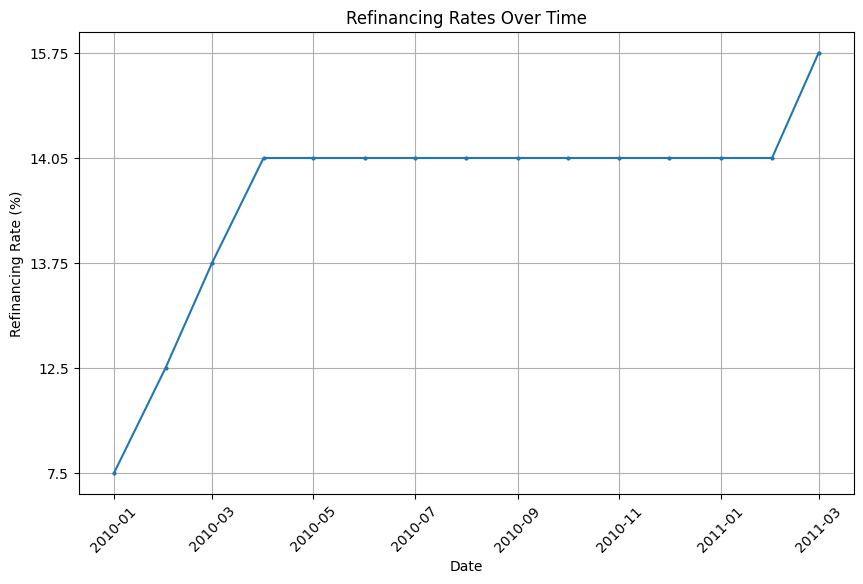

In [99]:
# Now proceed with plotting
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.plot(preds_df['Date'], preds_df['predict'], marker='o', linestyle='-', markersize=2)
#plt.plot(preds_df['Start_Date'], preds_df['Refinancing_Rates'], marker='o', linestyle='-', markersize=2)
plt.title('Refinancing Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Refinancing Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better readability

# Show the plot
plt.show()

In [100]:
# Extract the year from Start_Date
years = refinancing_rate['Start_Date'].dt.year

# Filter rows for years 2010 to 2011
df_2010_2011 = refinancing_rate[(refinancing_rate['Start_Date'] >= '2010-01-01') & (refinancing_rate['Start_Date'] <= '2011-03-01')]

print(df_2010_2011)

   Start_Date  Refinancing_Rates
74 2010-01-01               5.50
75 2010-02-01               6.00
76 2010-03-01               6.50
77 2010-03-01               6.50
78 2010-04-01               7.00
79 2010-05-01               7.25
80 2010-06-01               7.25
81 2010-07-01               7.25
82 2010-08-01               7.25
83 2010-09-01               7.25
84 2010-10-01               7.25
85 2010-11-01               7.25
86 2010-12-01               7.25
87 2011-01-01               7.25
88 2011-02-01               7.75
89 2011-03-01               8.25


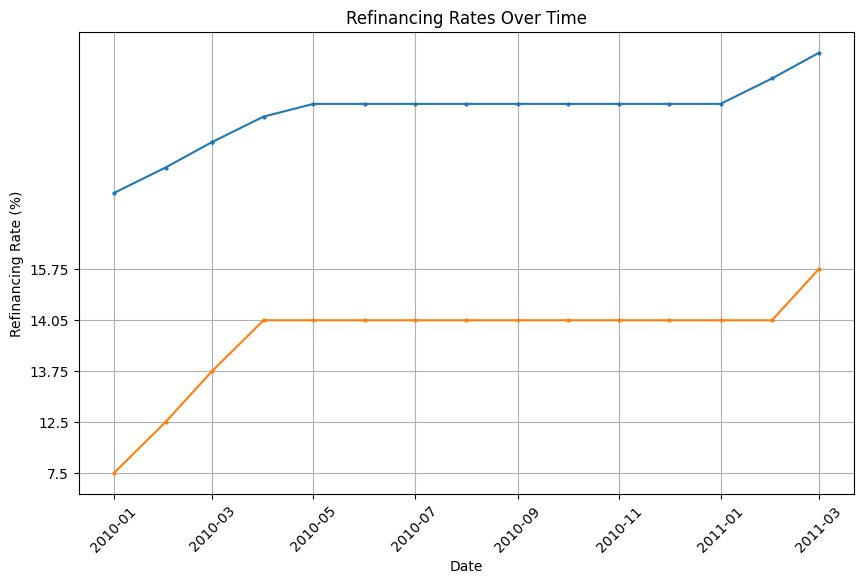

In [101]:
# Now proceed with plotting
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.plot(df_2010_2011['Start_Date'], df_2010_2011['Refinancing_Rates'], marker='o', linestyle='-', markersize=2)
plt.plot(preds_df['Date'], preds_df['predict'], marker='o', linestyle='-', markersize=2)
#plt.plot(preds_df['Start_Date'], preds_df['Refinancing_Rates'], marker='o', linestyle='-', markersize=2)
plt.title('Refinancing Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Refinancing Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better readability

# Show the plot
plt.show()

In [102]:
refinancing_rate = refinancing_rate.reset_index()
refinancing_rate

,index,Start_Date,Refinancing_Rates
0,0,2003-12-01,9.00
1,1,2004-01-01,9.00
2,2,2004-02-01,9.00
3,3,2004-03-01,6.00
4,4,2004-04-01,6.00
...,...,...,...
242,242,2023-10-01,9.75
243,243,2023-11-01,9.50
244,244,2023-12-01,9.25
245,245,2024-01-01,8.75


In [103]:
# Ensure both DataFrames have the date in the same format and column name
#preds_df.rename(columns={'Date': 'Start_Date','predict':'Refinancing_Rates'}, inplace=True)

# Concatenate the dataframes one after the other along the rows (axis=0)
combined_df = pd.concat([refinancing_rate, preds_df], axis=0)

# Reset the index of the combined dataframe to avoid any duplicate indices
combined_df.reset_index(drop=True, inplace=True)

In [104]:
combined_df

,index,Start_Date,Refinancing_Rates,Date,predict
0,0.0,2003-12-01,9.0,NaT,NaN
1,1.0,2004-01-01,9.0,NaT,NaN
2,2.0,2004-02-01,9.0,NaT,NaN
3,3.0,2004-03-01,6.0,NaT,NaN
4,4.0,2004-04-01,6.0,NaT,NaN
...,...,...,...,...,...
257,NaN,NaT,NaN,2010-11-01,14.05
258,NaN,NaT,NaN,2010-12-01,14.05
259,NaN,NaT,NaN,2011-01-01,14.05
260,NaN,NaT,NaN,2011-02-01,14.05


In [105]:
print(h2o.estimators.xgboost.H2OXGBoostEstimator.available())

Cannot build an XGBoost model - no backend found.
False
